In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [4]:
def f(x,t):
    return np.exp(x) - x*np.exp(t)

In [5]:
def System(x,y):
    dydx = x +2*y
    return np.array([dydx])

In [6]:
def RungeKutta(f, x, y, h):
    k1 = h * f(y, x)
    k2 = h * f(y + 0.5 * k1,x)
    k3 = h * f(y + 0.5 * k2,x)
    k4 = h * f(y + k3, x)
    return (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [7]:
def IntegratorAdams(f,t):
    #difine el paso
    h = x[1] - x[0]
    #______________________________________
    y = np.zeros_like(t)
    y[0] = 0
    for i in range(1,5):
        p = RungeKutta(f,x[i-1],y[i-1],h)
        y[i] = y[i-1] + p[0]
    yc = y.copy()
    K11 = np.zeros(1)
    K12 = np.zeros(1)
    K13 = np.zeros(1)
    K14 = np.zeros(1)
    k15 = np.zeros(1)
    for i in range(5,len(t)):
        K11 = f(x[i-1],y[i-1])
        K12 = f(x[i-2],y[i-2])
        K13 = f(x[i-3],y[i-3])
        K14 = f(x[i-4],y[i-4])
        K15 = f(x[i-5],y[i-5])
        y[i] = y[i-1] + h/720 * (1901*K11[0] - 2774*K12[0] + 2616*K13[0] - 1274*K14[0] + 251*K15[0])
        # Futuro
        Kmulton = f(x[i],y[i])
        
        yc[i] =  yc[i-1] +  h*((475)*Kmulton[0]+(1427)*K11[0]-(798)*K12[0]+(482)*K13[0]-(173)*K14[0]+(27)*K15[0])/1440
    
    return y,yc

In [17]:
x = np.linspace(0.,4.,100)
sol = IntegratorAdams(System,x)

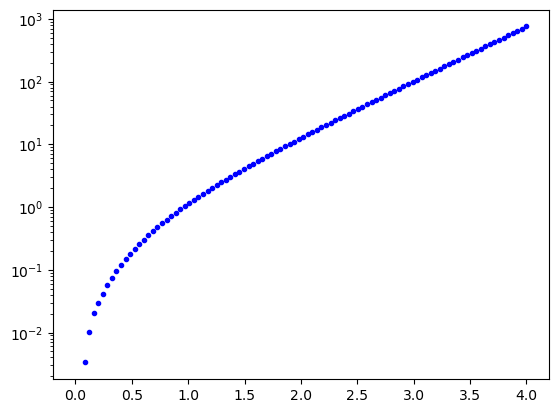

In [18]:
plt.scatter(x,sol[1],marker='.',color='b')
plt.yscale('log')


In [19]:
def f(x):
    return -(x/2)-((1-np.exp(2*x))/4)
y_exc=f(x)

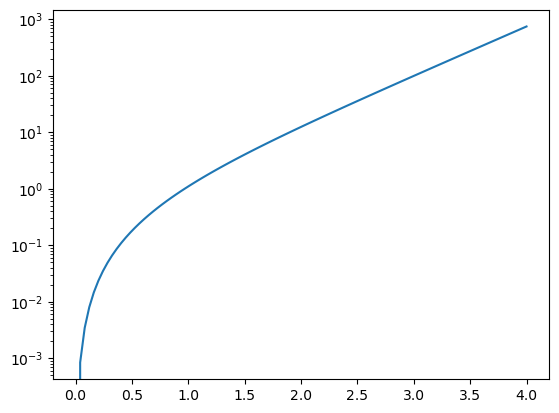

In [20]:
plt.plot(x,y_exc)
plt.yscale('log')


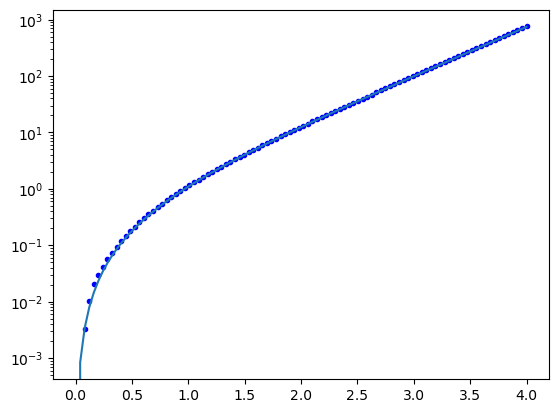

In [21]:
plt.plot(x,y_exc)
plt.scatter(x,sol[1],marker='.',color='b')
plt.yscale('log')

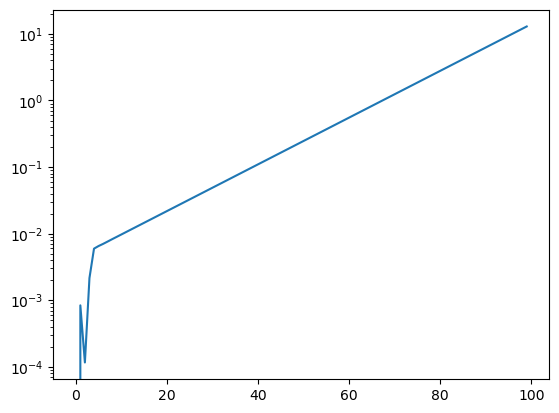

In [23]:
plt.plot(np.abs(sol[1]-y_exc))
plt.yscale('log')